# Ejercicio con regularizadores

In [6]:
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras
print(tf.keras.__version__)
print("GPU Available:", tf.config.list_physical_devices('GPU'))
print(tf.__version__)
from keras.datasets import mnist
from keras import models
from keras import layers
import numpy as np
import matplotlib.pyplot as plt
from keras import regularizers

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.
2.9.0
GPU Available: []
2.9.2


In [7]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()# Descarga los datos de MNIST

In [8]:
# Prepara con reshape y normaliza las imágenes tanto de entrenamiento como de test
train_images = train_images.reshape((60000, 28 * 28))
test_images = test_images.reshape((10000, 28 * 28))

train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

In [9]:
# Crear un subconjunto de imágenes de entrenamiento que llamaré
# validation_images, para hacer las validaciones, con las 10000 últimas imágenes 
# del set de datos de entrenamiento (train_images) (obviamente, lo mismo con las
# etiquetas correspondientes -> validation_labels). Deja preparadas las 50K 
# primeras imágenes y etiquetas para entrenamiento (train_images y train_labels)
validation_images = train_images[50000:]
train_images = train_images[0:49999]

validation_labels = train_labels[50000:]
train_labels = train_labels[0:49999]

In [43]:
def crea_modelo(regularizador):
  # Define una función que recibe un número del 0 al 4 que creará:
  # un modelo secuencial con una capa de entrada densa de 512 neuronas
  # con activación relu y la capa de salida que le corresponda según el problema
  # Ahora, en función del número del regularizador:
  # Si es 0, no mete ningún regularizador
  # Si es 1, mete un regularizador de tipo l1 y valor 0.001
  # Si es 2, mete un regularizador de tipo l2 y valor 0.001
  # Si es 3, mete un regularizador de tipo l1_l2 y valor 0.001 para ambos
  # Si es 4, mete un Dropout del 50% después de la primera capa densa
  # Si es distinto que estos valores, escribe el error y retorna
  # Al final, esta función pinta el summary del modelo y retorna el modelo creado
  modelo = models.Sequential()
  if regularizador == 0:
    modelo.add(layers.Dense(512, activation='relu', input_shape=(28*28,)))
  elif regularizador == 1:
    modelo.add(layers.Dense(512, kernel_regularizer=regularizers.l1(0.001), activation='relu', input_shape=(28*28,)))
  elif regularizador == 2:
    modelo.add(layers.Dense(512, kernel_regularizer=regularizers.l2(0.001), activation='relu', input_shape=(28*28,)))
  elif regularizador == 3:
    modelo.add(layers.Dense(512, kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001), activation='relu', input_shape=(28*28,)))
  elif regularizador == 4:
    modelo.add(layers.Dense(512, activation='relu', input_shape=(28*28,)))
    modelo.add(layers.Dropout(0.5))
  else:
    print('El regularizador debe estar entre 0 y 4')
    return
  modelo.add(layers.Dense(10, activation='softmax'))
  modelo.summary()
  return modelo

In [11]:
def compila_modelo(modelo): 
  # Define una función que recibe un modelo, lo compila con un optimizador
  # 'rmsprop', con una función de pérdida 'sparse_categorical_crossentropy' y
  # una métrica de precisión. La función retorna el modelo
  modelo.compile(optimizer='rmsprop', 
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])


  return modelo

In [12]:
def entrena_modelo(modelo):
  # Define una función que entrena el modelo que se le pasa por parámetro,
  # con las imágenes y etiquetas de entrenamiento, con 30 iteraciones y 128
  # de tamaño de minilote y con el validation_data creado más arriba.
  # Esta función devuelve un history
  historia = modelo.fit(train_images, train_labels,
            batch_size=128,
            epochs=30,
            validation_data = (validation_images, validation_labels))
  return historia

In [13]:
def pinta_perdida_entrenamiento_validacion(historia):
  history_dict = historia.history
  acc = historia.history['accuracy']
  val_acc = historia.history['val_accuracy']
  loss = historia.history['loss']
  val_loss = historia.history['val_loss']
  epochs = range(1, len(acc) + 1)
  # "bo" es para "punto azun"
  plt.plot(epochs, loss, 'bo', label='Pérdida de Entrenamiento')
  # "b" es para "linea continua azul"
  plt.plot(epochs, val_loss, 'b', label='Pérdida de Validación')
  plt.title('Pérdida de Entrenamiento y Validación')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()

In [14]:
def pinta_precision_entrenamiento_validacion(historia):
  history_dict = historia.history
  acc = historia.history['accuracy']
  val_acc = historia.history['val_accuracy']
  loss = historia.history['loss']
  val_loss = historia.history['val_loss']
  plt.clf()   # Limpia la figura
  acc_values = history_dict['accuracy']
  val_acc_values = history_dict['val_accuracy']
  epochs = range(1, len(acc) + 1)
  plt.plot(epochs, acc, 'bo', label='Precisión de Entrenamiento')
  plt.plot(epochs, val_acc, 'b', label='Precisión de Validación')
  plt.title('Precisión de Entrenamiento y Valización')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()

## Una vez definidas todas las funciones anteriores, ejecuta las siguientes llamadas a dichas funciones y deduce que está pasando y, para este contexto, que es lo que mejor está funcionando

### Caso 0, sin regularizadores

In [15]:
network0 = crea_modelo(0)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [16]:
network0 = compila_modelo(network0)

In [17]:
historia0 = entrena_modelo(network0)

Epoch 1/30
391/391 [==============================] - 6s 12ms/step - loss: 0.2802 - accuracy: 0.9186 - val_loss: 0.1401 - val_accuracy: 0.9595
Epoch 2/30
391/391 [==============================] - 5s 12ms/step - loss: 0.1171 - accuracy: 0.9657 - val_loss: 0.0978 - val_accuracy: 0.9715
Epoch 3/30
391/391 [==============================] - 5s 12ms/step - loss: 0.0767 - accuracy: 0.9772 - val_loss: 0.0851 - val_accuracy: 0.9748
Epoch 4/30
391/391 [==============================] - 5s 13ms/step - loss: 0.0548 - accuracy: 0.9832 - val_loss: 0.0892 - val_accuracy: 0.9742
Epoch 5/30
391/391 [==============================] - 5s 12ms/step - loss: 0.0415 - accuracy: 0.9878 - val_loss: 0.0747 - val_accuracy: 0.9777
Epoch 6/30
391/391 [==============================] - 4s 11ms/step - loss: 0.0315 - accuracy: 0.9913 - val_loss: 0.0833 - val_accuracy: 0.9774
Epoch 7/30
391/391 [==============================] - 5s 13ms/step - loss: 0.0238 - accuracy: 0.9930 - val_loss: 0.0762 - val_accuracy: 0.9795

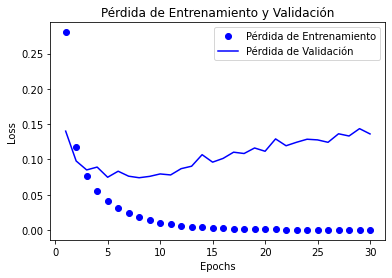

In [18]:
pinta_perdida_entrenamiento_validacion(historia0)

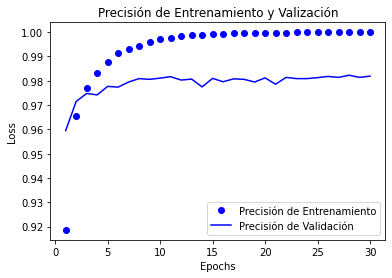

In [19]:
pinta_precision_entrenamiento_validacion(historia0)

### Caso 1: Con regularizador l1

In [20]:
network1 = crea_modelo(1)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 512)               401920    
                                                                 
 dense_3 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [21]:
network1 = compila_modelo(network1)

In [22]:
historia1 = entrena_modelo(network1)

Epoch 1/30
391/391 [==============================] - 6s 15ms/step - loss: 2.1404 - accuracy: 0.8425 - val_loss: 1.0332 - val_accuracy: 0.8821
Epoch 2/30
391/391 [==============================] - 5s 14ms/step - loss: 0.9641 - accuracy: 0.8787 - val_loss: 0.8865 - val_accuracy: 0.8948
Epoch 3/30
391/391 [==============================] - 5s 14ms/step - loss: 0.8393 - accuracy: 0.9003 - val_loss: 0.7927 - val_accuracy: 0.9068
Epoch 4/30
391/391 [==============================] - 5s 14ms/step - loss: 0.7614 - accuracy: 0.9133 - val_loss: 0.7112 - val_accuracy: 0.9242
Epoch 5/30
391/391 [==============================] - 6s 14ms/step - loss: 0.7093 - accuracy: 0.9222 - val_loss: 0.6794 - val_accuracy: 0.9332
Epoch 6/30
391/391 [==============================] - 5s 14ms/step - loss: 0.6726 - accuracy: 0.9301 - val_loss: 0.6341 - val_accuracy: 0.9426
Epoch 7/30
391/391 [==============================] - 5s 14ms/step - loss: 0.6471 - accuracy: 0.9329 - val_loss: 0.6279 - val_accuracy: 0.9406

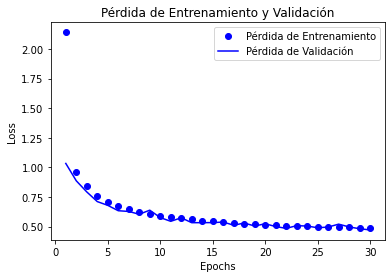

In [23]:
pinta_perdida_entrenamiento_validacion(historia1)

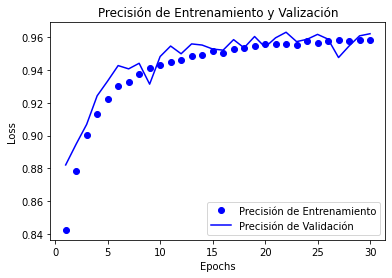

In [24]:
pinta_precision_entrenamiento_validacion(historia1)

### Caso 2: Con regularizador l2

In [25]:
network2 = crea_modelo(2)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 512)               401920    
                                                                 
 dense_5 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [26]:
network2 = compila_modelo(network2)

In [27]:
historia2 = entrena_modelo(network2)

Epoch 1/30
391/391 [==============================] - 6s 14ms/step - loss: 0.5291 - accuracy: 0.9117 - val_loss: 0.3098 - val_accuracy: 0.9500
Epoch 2/30
391/391 [==============================] - 5s 13ms/step - loss: 0.2662 - accuracy: 0.9537 - val_loss: 0.2221 - val_accuracy: 0.9614
Epoch 3/30
391/391 [==============================] - 5s 13ms/step - loss: 0.2128 - accuracy: 0.9630 - val_loss: 0.2120 - val_accuracy: 0.9615
Epoch 4/30
391/391 [==============================] - 5s 13ms/step - loss: 0.1886 - accuracy: 0.9662 - val_loss: 0.1709 - val_accuracy: 0.9739
Epoch 5/30
391/391 [==============================] - 6s 15ms/step - loss: 0.1739 - accuracy: 0.9699 - val_loss: 0.1711 - val_accuracy: 0.9716
Epoch 6/30
391/391 [==============================] - 5s 13ms/step - loss: 0.1654 - accuracy: 0.9704 - val_loss: 0.1531 - val_accuracy: 0.9731
Epoch 7/30
391/391 [==============================] - 7s 18ms/step - loss: 0.1575 - accuracy: 0.9728 - val_loss: 0.1687 - val_accuracy: 0.9681

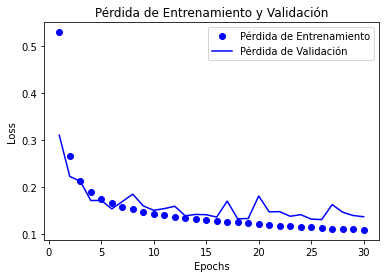

In [28]:
pinta_perdida_entrenamiento_validacion(historia2)

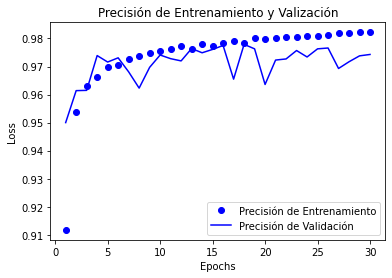

In [29]:
pinta_precision_entrenamiento_validacion(historia2)

### Caso 3: Con regularizador l1_l2

In [30]:
network3 = crea_modelo(3)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 512)               401920    
                                                                 
 dense_7 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [31]:
network3 = compila_modelo(network3)

In [32]:
historia3 = entrena_modelo(network3)

Epoch 1/30
391/391 [==============================] - 7s 16ms/step - loss: 2.1888 - accuracy: 0.8410 - val_loss: 1.0801 - val_accuracy: 0.8714
Epoch 2/30
391/391 [==============================] - 6s 15ms/step - loss: 0.9818 - accuracy: 0.8775 - val_loss: 1.0252 - val_accuracy: 0.8468
Epoch 3/30
391/391 [==============================] - 5s 14ms/step - loss: 0.8624 - accuracy: 0.8975 - val_loss: 0.8129 - val_accuracy: 0.9044
Epoch 4/30
391/391 [==============================] - 5s 14ms/step - loss: 0.7900 - accuracy: 0.9113 - val_loss: 0.7863 - val_accuracy: 0.9108
Epoch 5/30
391/391 [==============================] - 6s 15ms/step - loss: 0.7392 - accuracy: 0.9206 - val_loss: 0.6678 - val_accuracy: 0.9411
Epoch 6/30
391/391 [==============================] - 6s 16ms/step - loss: 0.6984 - accuracy: 0.9273 - val_loss: 0.6761 - val_accuracy: 0.9288
Epoch 7/30
391/391 [==============================] - 6s 14ms/step - loss: 0.6694 - accuracy: 0.9327 - val_loss: 0.6380 - val_accuracy: 0.9415

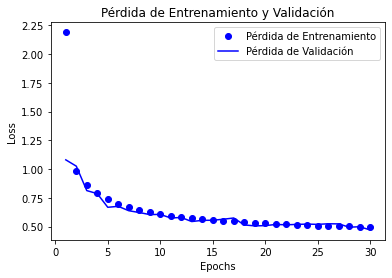

In [33]:
pinta_perdida_entrenamiento_validacion(historia3)

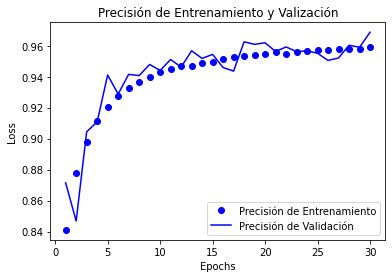

In [34]:
pinta_precision_entrenamiento_validacion(historia3)

### Caso 4: Con Droput

In [35]:
network4 = crea_modelo(4)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 512)               401920    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_9 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [36]:
network4 = compila_modelo(network4)

In [37]:
historia4 = entrena_modelo(network4)

Epoch 1/30
391/391 [==============================] - 6s 13ms/step - loss: 0.3420 - accuracy: 0.8993 - val_loss: 0.1582 - val_accuracy: 0.9539
Epoch 2/30
391/391 [==============================] - 5s 12ms/step - loss: 0.1677 - accuracy: 0.9498 - val_loss: 0.1102 - val_accuracy: 0.9685
Epoch 3/30
391/391 [==============================] - 5s 13ms/step - loss: 0.1281 - accuracy: 0.9616 - val_loss: 0.0952 - val_accuracy: 0.9725
Epoch 4/30
391/391 [==============================] - 5s 12ms/step - loss: 0.1050 - accuracy: 0.9682 - val_loss: 0.0902 - val_accuracy: 0.9759
Epoch 5/30
391/391 [==============================] - 5s 12ms/step - loss: 0.0932 - accuracy: 0.9723 - val_loss: 0.0786 - val_accuracy: 0.9759
Epoch 6/30
391/391 [==============================] - 5s 12ms/step - loss: 0.0824 - accuracy: 0.9753 - val_loss: 0.0799 - val_accuracy: 0.9786
Epoch 7/30
391/391 [==============================] - 5s 12ms/step - loss: 0.0734 - accuracy: 0.9773 - val_loss: 0.0854 - val_accuracy: 0.9780

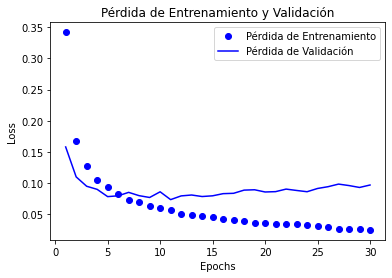

In [38]:
pinta_perdida_entrenamiento_validacion(historia4)

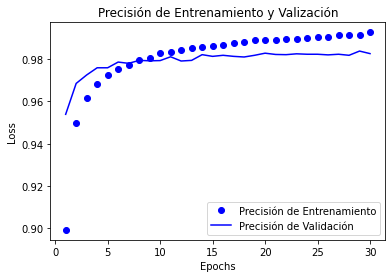

In [39]:
pinta_precision_entrenamiento_validacion(historia4)

### Caso 5: Error de código de regularizador

In [44]:
network5 = crea_modelo(5)

El regularizador debe estar entre 0 y 4


### CONCLUSIONES

Una vez hemos observado cómo se entrena el modelo en cada uno de los casos y  habiendo visto la pérdida y la precisión de los datos de validación y las gráficas concluimos lo siguiente.

En el caso 0 vemos que la pérdida frente a los datos de validación va dismuniyendo hasta la época 9 (con algún pico) y a partir de ésta, la pérdida aumenta. Lo mismo pasa con los datos de validación, a aprtir de la época 10 la precisión aumenta y se distancia de los datos de entrenamiento. Es cedir, empieza a haber sobreentrenamiento a partir de la época 9, por lo que la mayor precisión que puede alcanzar es de 0.98.

En el caso 1, añadimos un regularizador l1 = 0.001. En este caso no se alcanza una precisión del 0.98, lo mismo nos pasa en el caso 2 y en el caso 3, siendo la mayor precisión de 0.968 en el caso 1, de 0.978 en el caso 2 y de 0.968 en el caso 3. Por lo que sigue habiendo sobreentrenamiento. Sin embargo, vemos que en el caso 4 sí alcanzamos esa precisión con un 0.9838 por lo que el regularizador Dropout es el que mejor ajusta el sobreentrenamiento. Aún así sigue habiendo sobreentrenamiento en el caso 4 si nos fijamos en las gráficas, por lo que habrá que recudir el número de épocas. 
